## Skincare and Beauty E-Commerce Analysis


The skincare and beauty e-commerce market are thriving and evolving rapidly. We have collected so much data, and now we are interested in gaining more insights about the market, product, customers and sales etc. 

The objective of this project is to analyze sales volumes and profitability across various product groups and markets and it would be conducted in this notebook which carries out exploratory data analysis (EDA) on a provided data set.

### Introduction ###


In the first stage, we will import necessary libraries to read and work with data.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [32]:
df = pd.read_excel('Global skincare and Beauty e-store_E-commerce Analysis_English.xlsx')
df.head(5)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


### Data Exploration & Cleaning ###

After reading data, let's have a quick overview of the dataset

In [33]:
#Show the number of rows and columns
df.shape

(51290, 19)

In [34]:
#Check type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             51290 non-null  int64         
 1   Order ID           51290 non-null  object        
 2   Order Date         51290 non-null  datetime64[ns]
 3   Customer ID        51290 non-null  object        
 4   Segment            51290 non-null  object        
 5   City               51290 non-null  object        
 6   State              51290 non-null  object        
 7   Country            51290 non-null  object        
 8   Country latitude   51290 non-null  float64       
 9   Country longitude  51290 non-null  float64       
 10  Region             51290 non-null  object        
 11  Market             51290 non-null  object        
 12  Subcategory        51290 non-null  object        
 13  Category           51290 non-null  object        
 14  Produc

Because all columns have 51290 values which is the same as the rows of dataset, it can be claimed that there isn't any null value in the entire table. 

In [35]:
#Show a description about dataset
df.describe()

,Row ID,Order Date,Country latitude,Country longitude,Quantity,Sales,Discount,Profit
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2022-05-11 21:26:49.155780608,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346
min,1.00000,2020-01-01 00:00:00,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000
25%,12823.25000,2021-06-19 00:00:00,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000
50%,25645.50000,2022-07-08 00:00:00,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000
75%,38467.75000,2023-05-22 00:00:00,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000
max,51290.00000,2023-12-31 00:00:00,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000
std,14806.29199,NaN,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680


The dataset stores data from 2020 to 2023. Looking at the 75th quartile value and the max value in the last 4 columns, there is a significant distance between them which could be considered as outliers. However, based on the meaning of those 4 columns, the outliers can be ignored.

In [36]:
#Check data duplication
df.duplicated().sum()

0

In [37]:
#Count unique values of object columns
df.select_dtypes('object').nunique()

Order ID       25728
Customer ID    17415
Segment            3
City            3650
State           1102
Country          164
Region            23
Market             5
Subcategory       17
Category           5
Product         3577
dtype: int64

In [38]:
df['Discount'].value_counts()

Discount
0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.002      461
0.150      459
0.270      388
0.300      340
0.450      325
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.150       82
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
0.450        2
Name: count, dtype: int64

### Data Transforming ###

Convert Order Date column into Year, Month, Day columns to analyze by time.

In [39]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Year,Month,Day
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,...,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0,2020,1,3
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,...,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0,2020,1,4
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,...,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5,2020,1,4
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,...,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0,2020,1,4
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,...,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5,2020,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,27381,IN-2015-TB2125058-42367,2023-12-29,TB-2125058,Consumer,Kanpur,Uttar Pradesh,India,20.593684,78.962880,...,Lipsticks,Make up,Orly Nail Lacquer Pink Chocolate Soft Brownish...,4,16,0.0,6.4,2023,12,29
51286,50758,JO-2015-PT909067-42367,2023-12-29,PT-909067,Consumer,Amman,'Amman,Jordan,30.585164,36.238414,...,Lipsticks,Make up,Butter London Nail Lacquer Shag Metallic Copper,2,16,0.0,6.4,2023,12,29
51287,19359,IT-2015-JC1577591-42368,2023-12-30,JC-1577591,Consumer,The Hague,South Holland,Netherlands,52.132633,5.291266,...,Lipsticks,Make up,Garden of Life B-Complex,2,40,0.5,-4.0,2023,12,30
51288,9475,MX-2015-TC21535132-42369,2023-12-31,TC-21535132,Self-Employed,Chaguanas,Chaguanas,Trinidad and Tobago,10.691803,-61.222503,...,Lipsticks,Make up,The Body Shop Tea Tree Skin Clearing Body Wash,2,12,0.0,4.8,2023,12,31


### Question Answering ###

#### 1.	What were the most profitable segments from 2020 to 2023? ####

In [40]:
df['Segment'].value_counts()

Segment
Consumer         26518
Corporate        15429
Self-Employed     9343
Name: count, dtype: int64

In [41]:
total_profit_by_segment = df[['Segment','Profit']].groupby('Segment').sum('profit').reset_index()
total_profit_by_segment

,Segment,Profit
0,Consumer,365377.602
1,Corporate,608523.326
2,Self-Employed,91512.722


<Axes: xlabel='Segment', ylabel='Profit'>

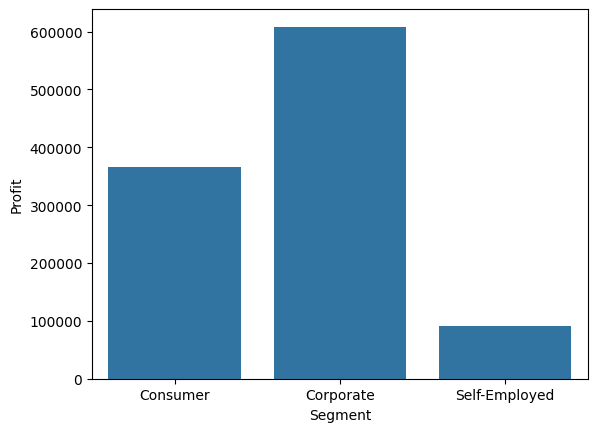

In [42]:
sns.barplot(data=total_profit_by_segment, x='Segment', y='Profit')


**Corporate segment is the most profitable from 2020 to 2023, whereas, self-employed is the least profitable in the same period.**

#### 2.    Can we have a map visual to interact with locations to see the profit distribution? ####

In [43]:
profit_and_location = df[['City','Country','Country latitude','Country longitude', 'Profit']]
profit_by_location = profit_and_location.groupby('Country')[['Country','Profit']].sum('Profit').reset_index()
profit_by_location.sort_values('Profit', ascending=False)

,Country,Profit
155,United States,207879.420
51,France,93483.100
96,Mexico,79893.788
30,China,76479.300
56,Germany,63342.100
...,...,...
4,Argentina,-6794.698
105,Netherlands,-8413.200
65,Honduras,-12451.702
109,Nigeria,-40429.850


C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\1777931042.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['Country']):


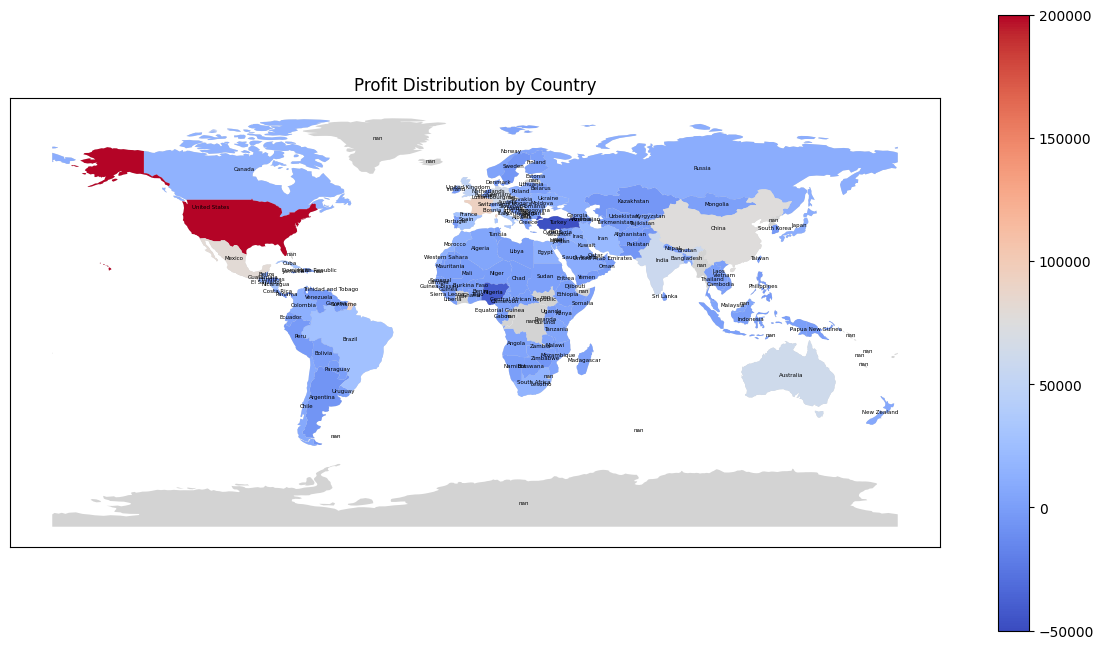

In [44]:
world = gpd.read_file('World/ne_110m_admin_0_countries.shp')
ax = world.plot(figsize=(15, 8), color='lightgray')
merged = world.merge(profit_by_location, left_on='SUBUNIT', right_on='Country', how='left')
merged.plot(column = 'Profit', ax=ax, marker='o', markersize=5, cmap='coolwarm',vmin=-50000, vmax=200000, legend=True)
plt.xticks([])  
plt.yticks([])
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['Country']):
    ax.text(x, y, label, fontsize=4, ha='center')
plt.title('Profit Distribution by Country')
plt.show()


**Upon comparing the map with the color bar values, it becomes clear that the profit is predominantly concentrated in larger countries, such as the USA and China. The majority of countries are shaded in light blue, corresponding to profit values ranging from 0 to 50,000**

#### 3.	What were the most profitable markets since 2020?

In [45]:
profit_and_market = df[['Year', 'Market', 'Profit']]
profit_by_market=profit_and_market.groupby(['Year', 'Market']).sum().reset_index()
profit_by_market.sort_values(['Market','Year'])

,Year,Market,Profit
0,2020,Africa,8336.050
5,2021,Africa,14359.200
10,2022,Africa,22117.250
15,2023,Africa,21400.950
1,2020,Asia Pacific,53985.640
6,2021,Asia Pacific,64578.480
11,2022,Asia Pacific,66489.380
16,2023,Asia Pacific,43689.090
2,2020,Europe,55780.900
7,2021,Europe,84260.700


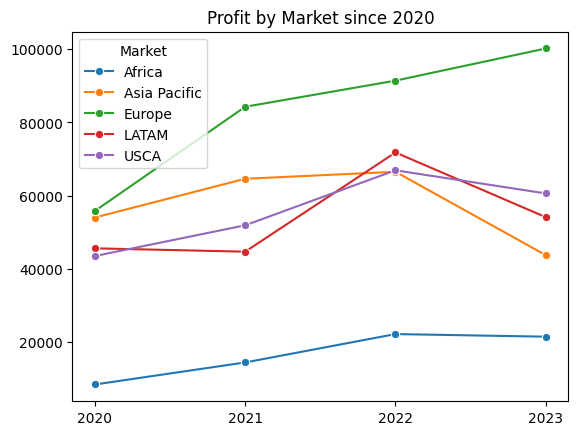

In [46]:
sns.lineplot(data=profit_by_market, x='Year', y='Profit', hue='Market', marker='o')
plt.xticks(ticks=[2020,2021,2022,2023])
plt.xlabel('')
plt.ylabel('')
plt.title('Profit by Market since 2020')
plt.show()

**Europe market has remained the highest profit since 2020**

#### 4.	What were the best seller products since 2020?

In [47]:
data_product_year = df[['Year', 'Quantity', 'Product']]
best_seller_product = data_product_year.groupby(['Product', 'Year']).sum().reset_index().sort_values(by=['Year', 'Quantity'], ascending=[True, False])
best_seller_product_each_year = best_seller_product.groupby('Year')[['Year', 'Quantity', 'Product']].apply(lambda x: x.head(5))
best_seller_product_each_year


Year  Quantity                                            Product
Year                                                                         
2020 4473   2020       265                                Herbal Essences Bio
     7877   2020       193                   Neutrogena Hydro Boost Gel Cream
     5477   2020       105    L'Oréal Infallible 24HR Eyeshadow Bronzed Taupe
     7558   2020       101    NYX Hot Singles Eyeshadow Chandelier Warm Peach
     4402   2020        96         Head & Shoulders Classic Clean Conditioner
2021 4474   2021       296                                Herbal Essences Bio
     7878   2021       221                   Neutrogena Hydro Boost Gel Cream
     4403   2021       135         Head & Shoulders Classic Clean Conditioner
     7067   2021       115  Maybelline Color Tattoo 24HR Eyeshadow Tough a...
     10893  2021       114                 TRESemmé Moisture Rich Conditioner
2022 4475   2022       487                                Herbal Essences Bio
     7879   2022       443                   Neutrogena Hydro Boost Gel Cream
     9301   2022       162          Redken Color Extend Magnetics Conditioner
     5479   2022       158    L'Oréal Infallible 24HR Eyeshadow Bronzed Taupe
     9560   2022       150       Revlon Nail Enamel Rich Raspberry Berry Pink
2023 4476   2023       732                                Herbal Essences Bio
     7880   2023       338                   Neutrogena Hydro Boost Gel Cream
     10895  2023       184                 TRESemmé Moisture Rich Conditioner
     4405   2023       178         Head & Shoulders Classic Clean Conditioner
     8705   2023       169          Orly Nail Lacquer Beach Cruiser Neon Pink

**Herbal Esssences Bio is the product having remained the best seller product yearly since 2020.**


#### 5.	Following above, can we also view the best seller categories and subcategories?

In [48]:
categories_quantity = df[['Quantity', 'Category']]
best_seller_category=categories_quantity.groupby(['Category']).sum().reset_index().sort_values('Quantity', ascending=False)
best_seller_category
subcategories_quantity = df[['Quantity', 'Subcategory']]
best_seller_subcategory=subcategories_quantity.groupby(['Subcategory']).sum().reset_index().sort_values('Quantity', ascending=False)
best_seller_subcategory = best_seller_subcategory.merge(df[['Category','Subcategory']], left_on='Subcategory',right_on='Subcategory', how='left').drop_duplicates()
best_seller_subcategory

,Subcategory,Quantity,Category
0,Nail care products,33257,Body care
6146,shampoos and conditioners,26817,Hair care
11195,Eye shadows and pencils,25588,Make up
16059,face moisturizing products,19216,Face care
19551,vitamins and supplements,18509,Body care
22985,brushes and applicators,18501,Home and Accessories
26342,Accessories,17281,Home and Accessories
29417,hair colors and toners,17177,Hair care
32571,body moisturizers,13867,Body care
35172,hand creams,13796,Body care


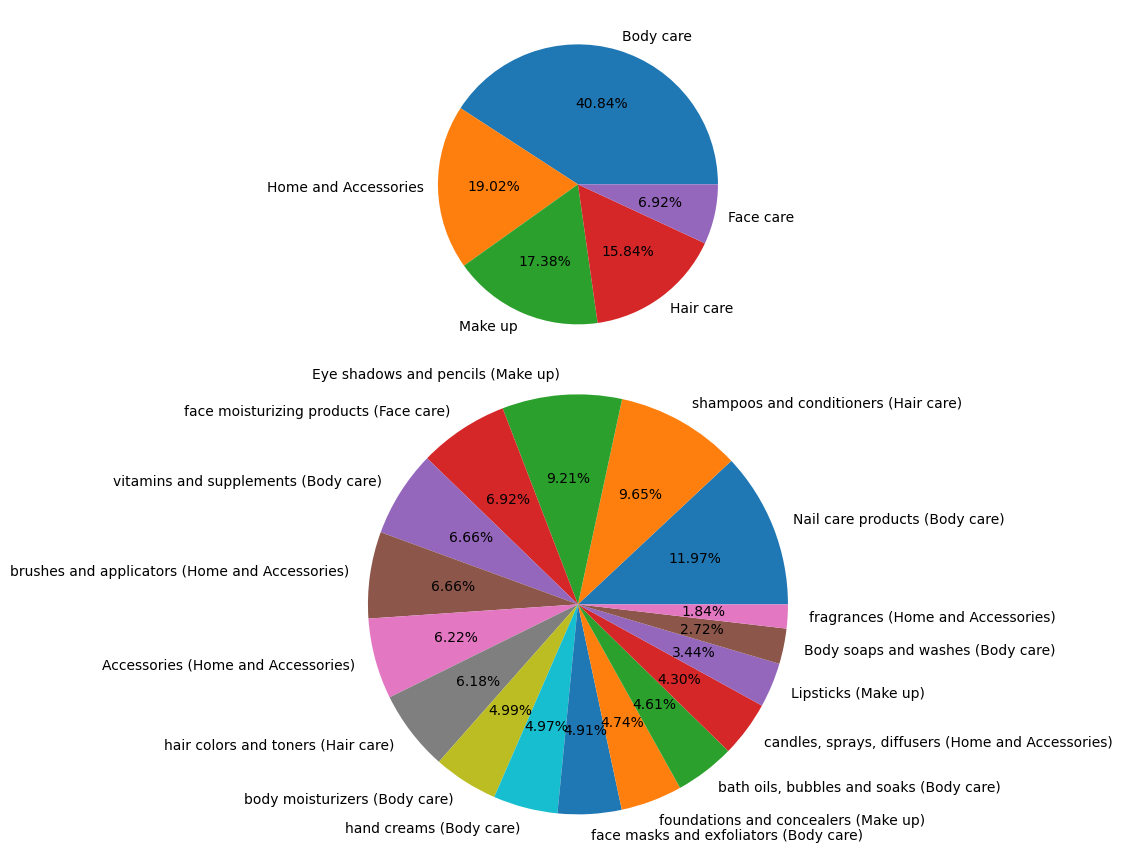

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)

plt.pie(x=best_seller_category['Quantity'], labels=best_seller_category['Category'], autopct="%.2f%%",radius=1)
plt.subplot(2,1,2)
plt.pie(x=best_seller_subcategory['Quantity'], labels=[f"{subcat} ({cat})" for subcat, cat in zip(best_seller_subcategory['Subcategory'], best_seller_subcategory['Category'])], autopct="%.2f%%", radius=1.5)
plt.subplots_adjust(wspace=4)

plt.show()

**Body care product is the best seller category and Nail care belongs to body care category is the best seller subcategory**

#### 6.	In each market, can we view the sales trend of each product/category/subcategory from 2020 to 2023?

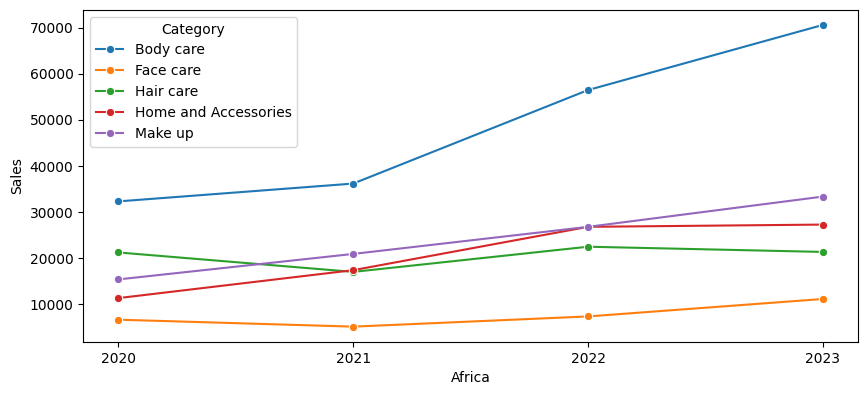

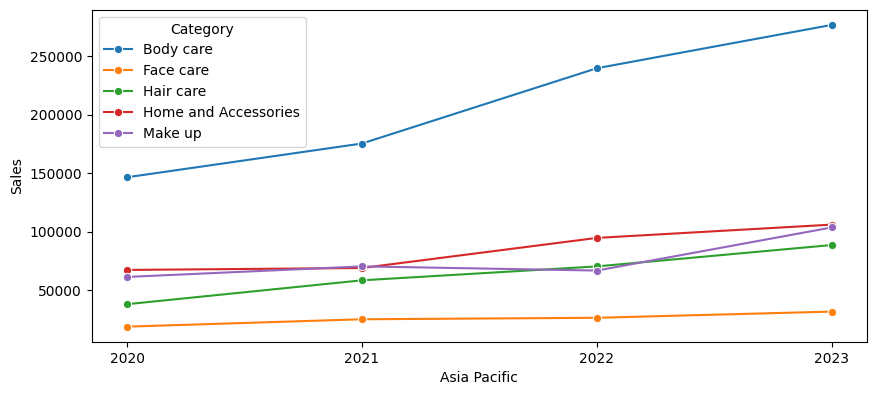

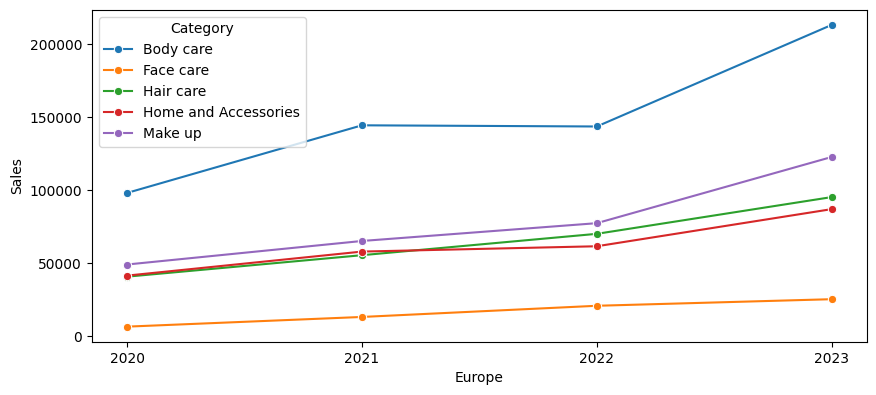

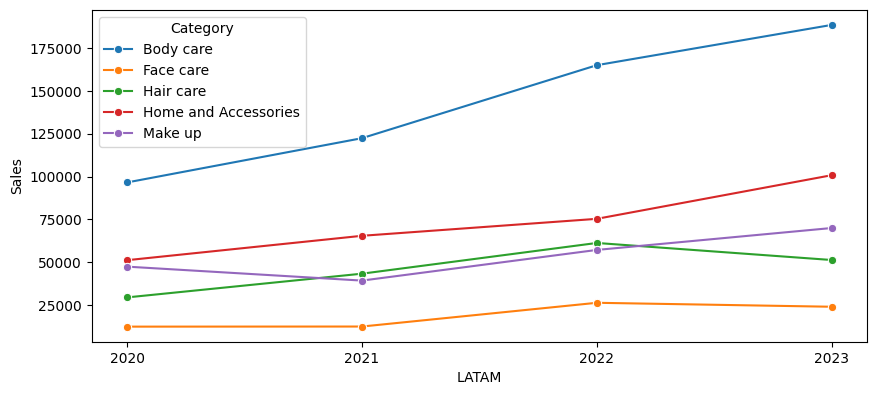

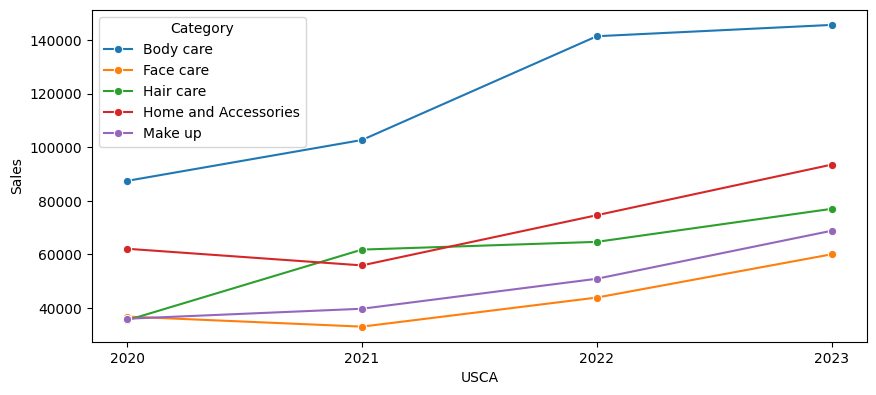

In [50]:
sales_market = df[['Sales', 'Category','Subcategory','Market', 'Year']]
sales_by_category_each_market = sales_market.groupby(['Market','Category','Year']).sum().reset_index()
for market in sales_by_category_each_market['Market'].value_counts().index:
    globals()['sales_by_category_in_%s'%market]= sales_by_category_each_market[sales_by_category_each_market['Market']==market]
i=0
for market in sales_by_category_each_market['Market'].value_counts().index:
    i += 1
    plt.figure(figsize=(10,25))
    plt.subplot(5,1,i)
    sns.lineplot(data=sales_by_category_each_market[sales_by_category_each_market['Market']==market], x='Year', y='Sales', hue='Category', marker='o')
    plt.xticks(ticks=[2020,2021,2022,2023])
    plt.xlabel(market)

**Overall, all category experienced an upward trend from 2020 to 2023 in every market, especially Body care category rose sharply in 2022 and 2023.**

In [51]:
sales_by_subcategory_each_market = sales_market.groupby(['Market','Subcategory','Year','Category']).sum(numeric_only=True).reset_index()
sales_by_subcategory_each_market  


,Market,Subcategory,Year,Category,Sales
0,Africa,Accessories,2020,Home and Accessories,3333
1,Africa,Accessories,2021,Home and Accessories,4390
2,Africa,Accessories,2022,Home and Accessories,8700
3,Africa,Accessories,2023,Home and Accessories,8422
4,Africa,Body soaps and washes,2020,Body care,3186
...,...,...,...,...,...
335,USCA,shampoos and conditioners,2023,Hair care,33857
336,USCA,vitamins and supplements,2020,Body care,13821
337,USCA,vitamins and supplements,2021,Body care,20093
338,USCA,vitamins and supplements,2022,Body care,18862


**Because there are 17 different subcategories, it is quite hard-looking to show all these subcategories in this notebook. This issue also happens with showing the trend of each product because of a high quantity of product. Therefore, I use PowerBI to have a better visualization to perform the trend of each product/category/subcategory.**

#### 7.	In each market, can we view the profits trend of each product/category/subcategory from 2020 to 2023?

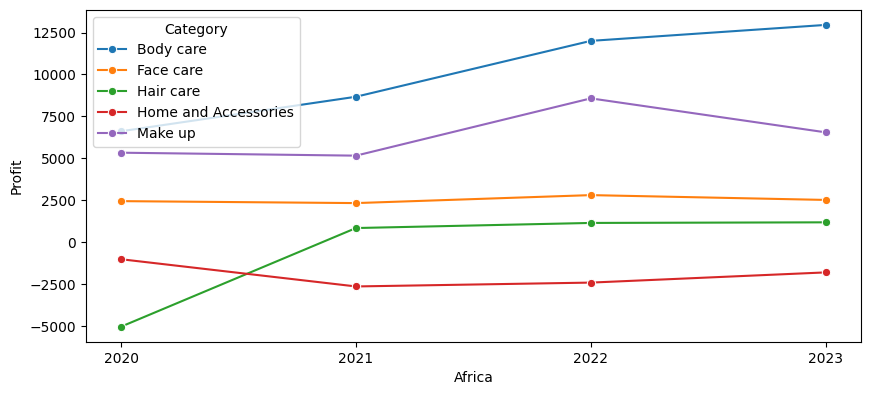

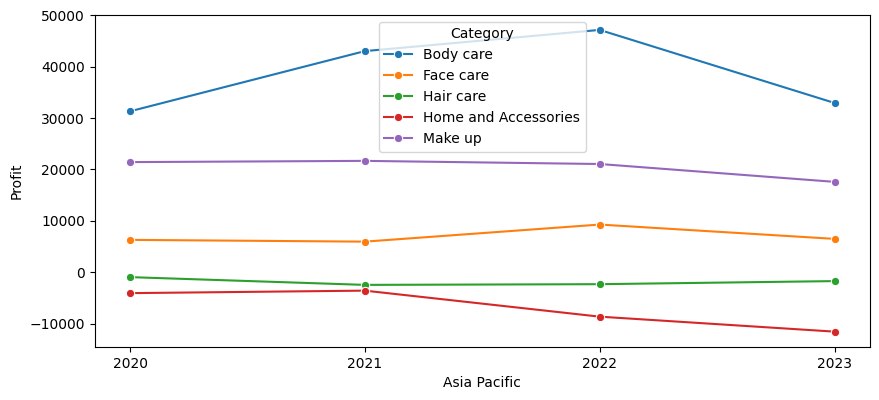

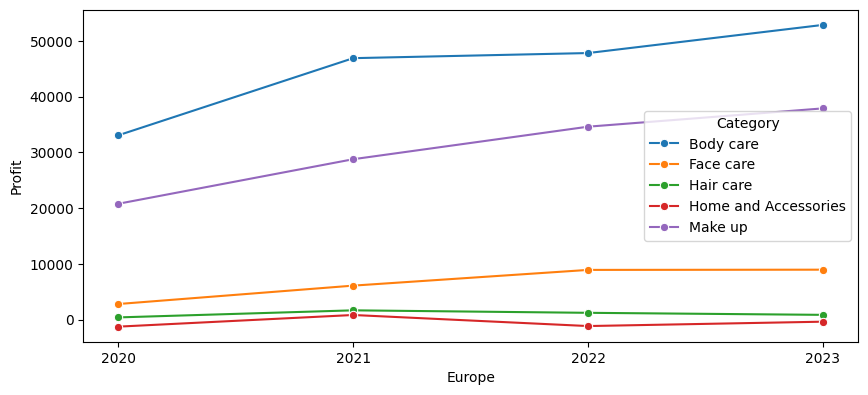

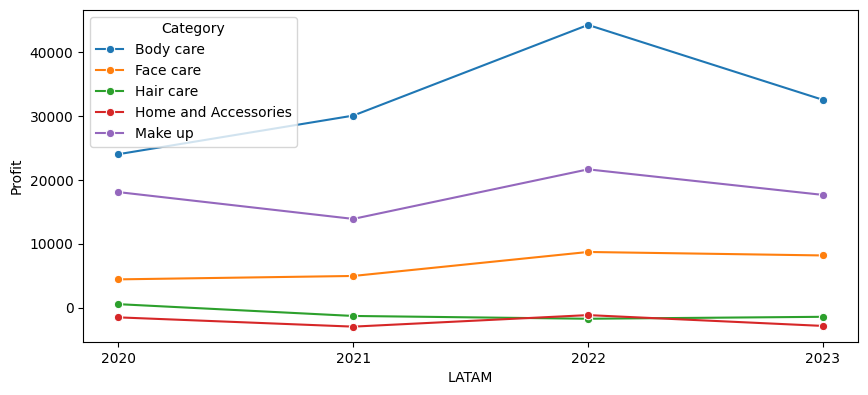

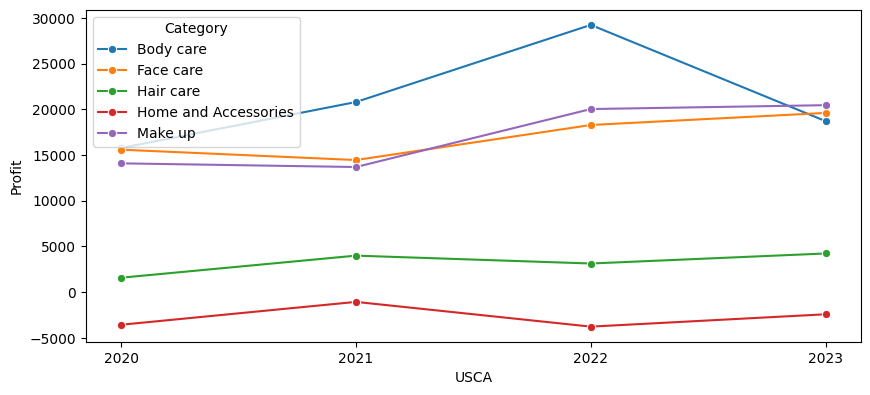

In [52]:
profit_market = df[['Profit', 'Category','Subcategory','Market', 'Year']]
profit_by_category_each_market = profit_market.groupby(['Market','Category','Year']).sum().reset_index()
for market in profit_by_category_each_market['Market'].value_counts().index:
    globals()['profit_by_category_each_%s'%market]= profit_by_category_each_market[profit_by_category_each_market['Market']==market]
i=0
for market in profit_by_category_each_market['Market'].value_counts().index:
    i += 1
    plt.figure(figsize=(10,25))
    plt.subplot(5,1,i)
    sns.lineplot(data=profit_by_category_each_market[profit_by_category_each_market['Market']==market], x='Year', y='Profit', hue='Category', marker='o')
    plt.xticks(ticks=[2020,2021,2022,2023])
    plt.xlabel(market)

**Overall, most categories increased gradually from 2020 and peaked in 2022. Some categories such as home & accessories got negative profit during 4 year in all markets.**


**Similar to the sales trend, therefore, the profit trend of each product/category/subcategory would be visualized on powerBI.**


#### 8.	Did we have a good discount strategy last a few years?  

To assess on the quality of a discount strategy, I would use data involved sales, profit, number of discount vouchers and their distribution through markets.

Because there are 29 different kinds of discount, I group all vouchers into partitions below.

In [53]:
def group_voucher(x):
    if 0<x <= 0.1:
        x = '1%-10%'
    elif 0.1<x<=0.2:
        x = '11%-20%'
    elif 0.2<x<=0.3:
        x = '21%-30%'
    elif 0.3<x<=0.4:
        x = '31%-40%'
    elif 0.4<x<=0.5:
        x = '41%-50%'
    elif 0.5<x<=0.6:
        x = '51%-60%'
    elif 0.6<x<=0.7:
        x = '61%-70%'
    elif 0.7<x<=0.8:
        x = '71%-80%'
    elif x>0.8:
        x = '81%-100%' #Numbers of voucher > 80% is not big enough to group like other partitions.
    return x

In [54]:
#Get all orders having discount (discount > 0)
discount = df[['Discount','Order ID','Market', 'Sales','Profit','Year']]
discount = discount[discount['Discount']>0]
discount.shape

(22281, 6)

First, I will find out how discount distribute to 5 markets.

In [55]:
#Distribution of discount through markets
distribution_discount = discount[['Discount', 'Market']]
distribution_discount['Discount'] = distribution_discount['Discount'].apply(lambda x: group_voucher(x))
distribution_discount = distribution_discount.groupby(['Discount', 'Market']).value_counts().reset_index()
distribution_discount

C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\2681680167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution_discount['Discount'] = distribution_discount['Discount'].apply(lambda x: group_voucher(x))


,Discount,Market,count
0,1%-10%,Africa,34
1,1%-10%,Asia Pacific,2353
2,1%-10%,Europe,1737
3,1%-10%,LATAM,461
4,1%-10%,USCA,94
5,11%-20%,Asia Pacific,910
6,11%-20%,Europe,532
7,11%-20%,LATAM,1123
8,11%-20%,USCA,3709
9,21%-30%,Asia Pacific,648


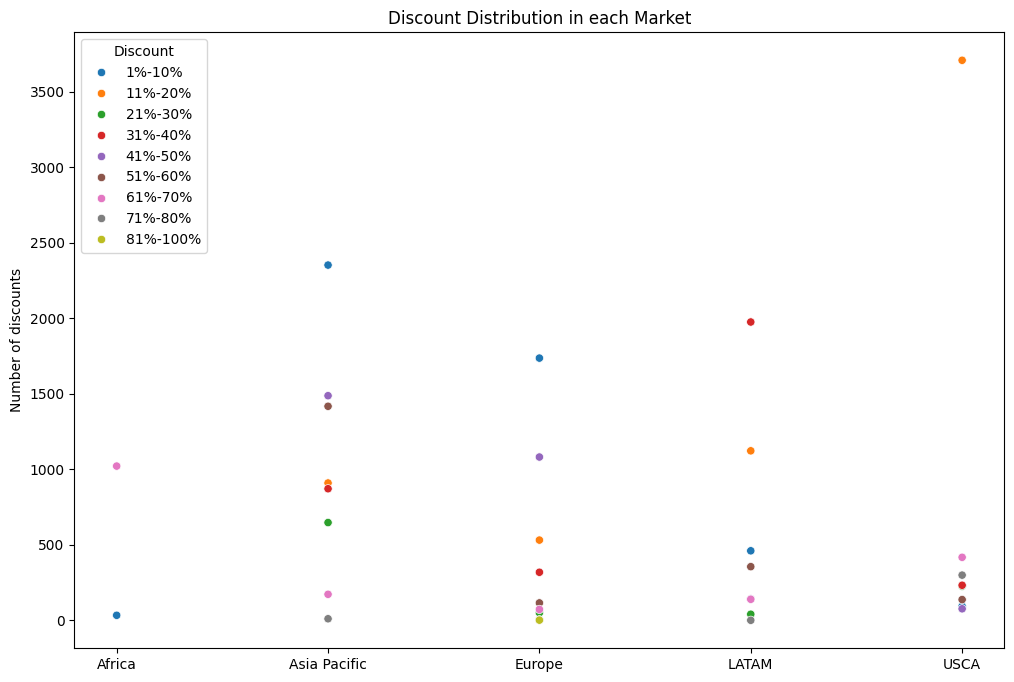

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=distribution_discount, x='Market', y='count', hue='Discount')
plt.xlabel('')
plt.ylabel('Number of discounts')
plt.title('Discount Distribution in each Market')
plt.show()

It's easily seen that discount strategy is applied separately for each market, in details, big discount would be used in small market and small discount would be used in big market. For example, in a less popular market like Africa, a large amount of big discount between 60%-70% was consumed. Toward popular markets like Asia or Europe, the majority of vouchers is 0-10%.



Text(0.5, 1.0, 'Discount Sales Trend by Year')

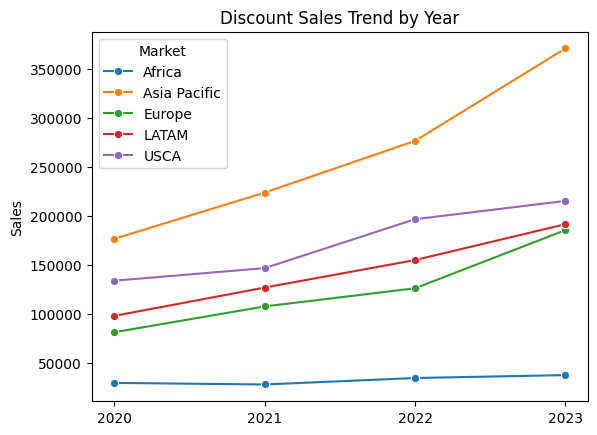

In [57]:
discount_sales_market = discount[['Market','Sales','Year']]
discount_sales_market = discount_sales_market.groupby(['Market','Year']).sum('Sales').reset_index().sort_values(['Market','Year'], ascending=[True, True])
sns.lineplot(data=discount_sales_market, x='Year', y='Sales', hue='Market', marker='o')
plt.xticks([2020,2021,2022,2023])
plt.xlabel('')
plt.title('Discount Sales Trend by Year')

From the chart, total sales of every market has growth year by year since 2020. It shows that, discount strategy really promote customer buying from the store. But, no matter how big discount was applied on Africa, it seemed like the discount strategy didn't work in here.

Text(0.5, 1.0, 'Discount Profit Trend by Year')

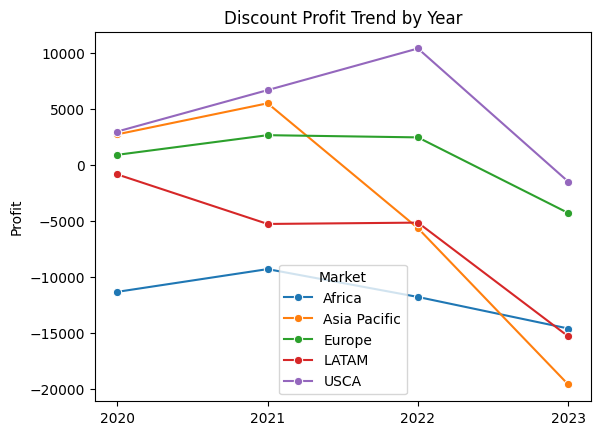

In [58]:
discount_Profit_market = discount[['Market','Profit','Year']]
discount_Profit_market = discount_Profit_market.groupby(['Market','Year']).sum('Profit').reset_index().sort_values(['Market','Year'], ascending=[True, True])
sns.lineplot(data=discount_Profit_market, x='Year', y='Profit', hue='Market', marker='o')
plt.xticks([2020,2021,2022,2023])
plt.xlabel('')
plt.title('Discount Profit Trend by Year')

**However, towards profit, there was a downward trend from 2021, except USCA in 2022. Combining this insight with findings above, I summary that:**

- Discount strategy was applied in each market. The bigger the market was, the smaller the discount value was

- Discount strategy was quite success in driving customers make more purchases with sales year-by-year growth, except for Africa

- Discount strategy did not improve profit of the store. In the 2 latest years, it even caused lost in most markets.

**Therefore, I assume that the store didn't have a good discount strategy.**

#### 9.	Can we list top 10 customers who spent most from each country every year?

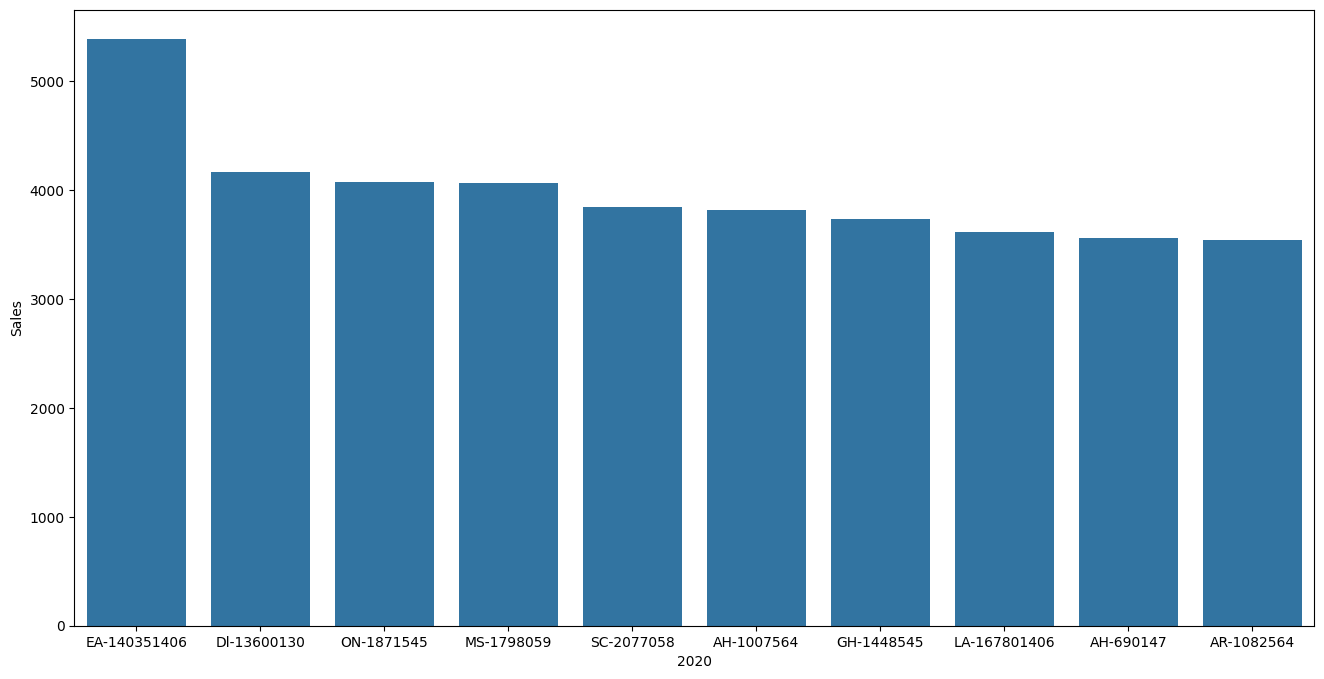

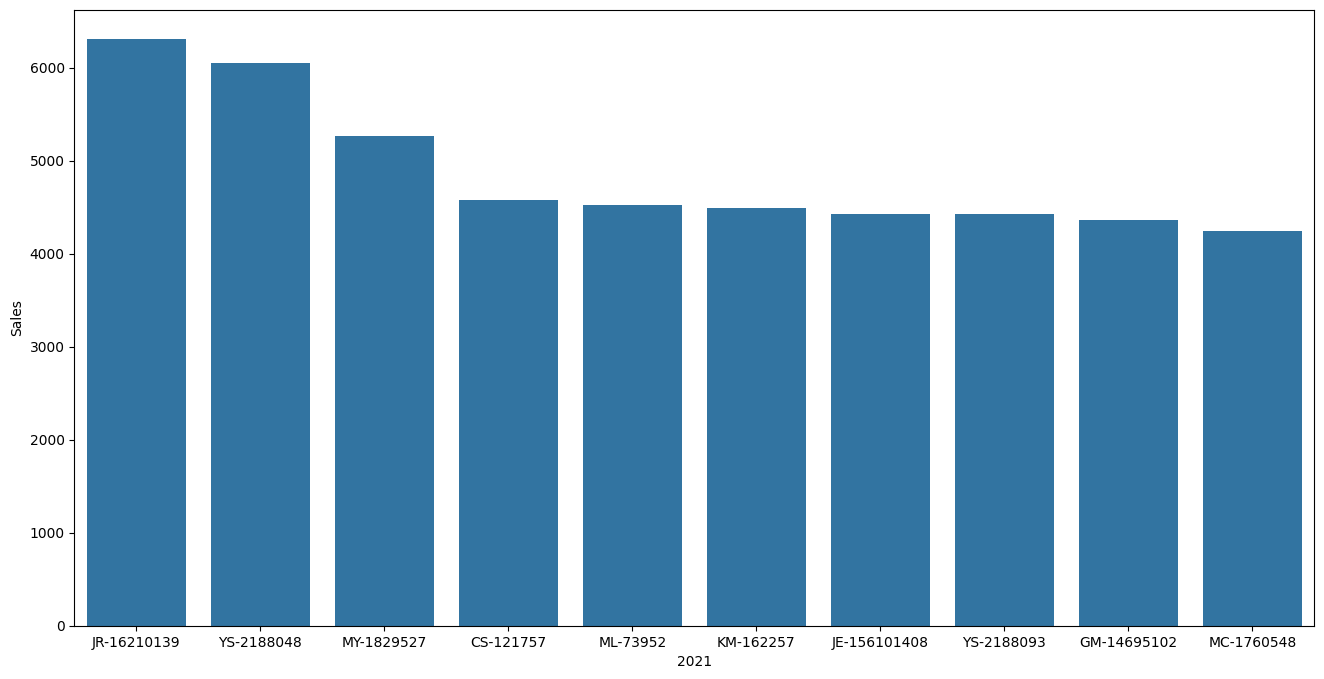

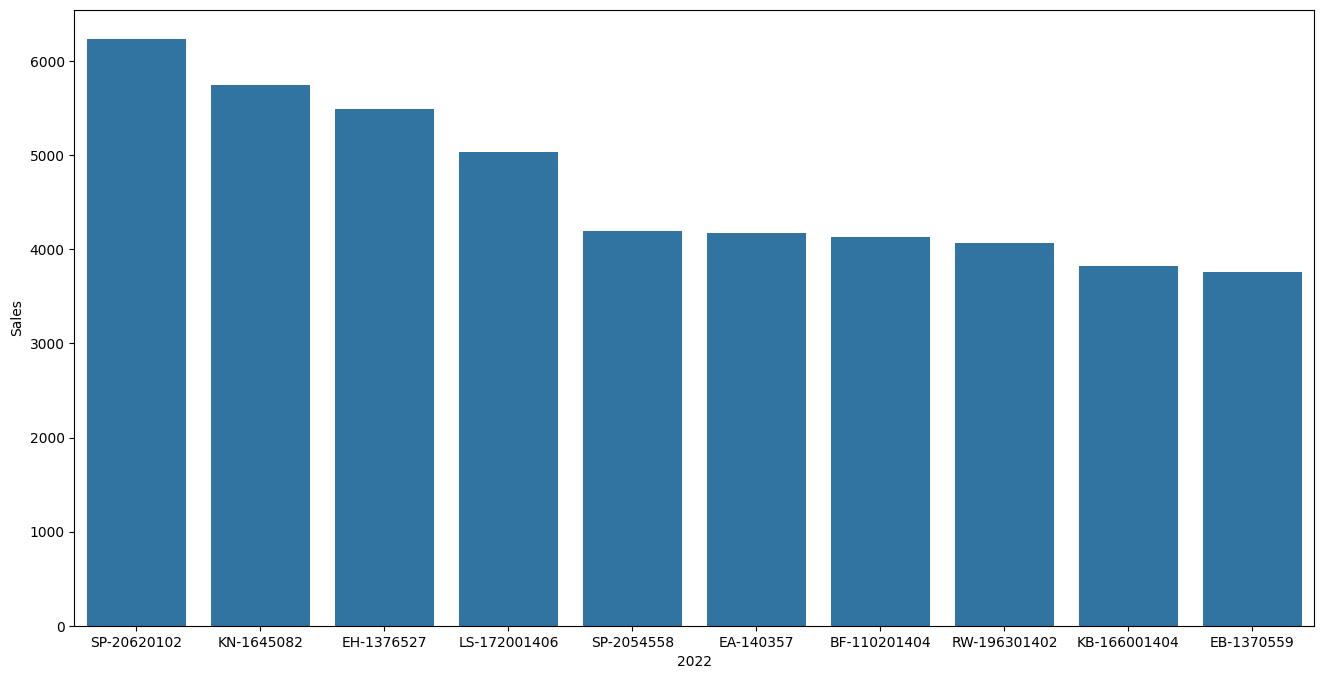

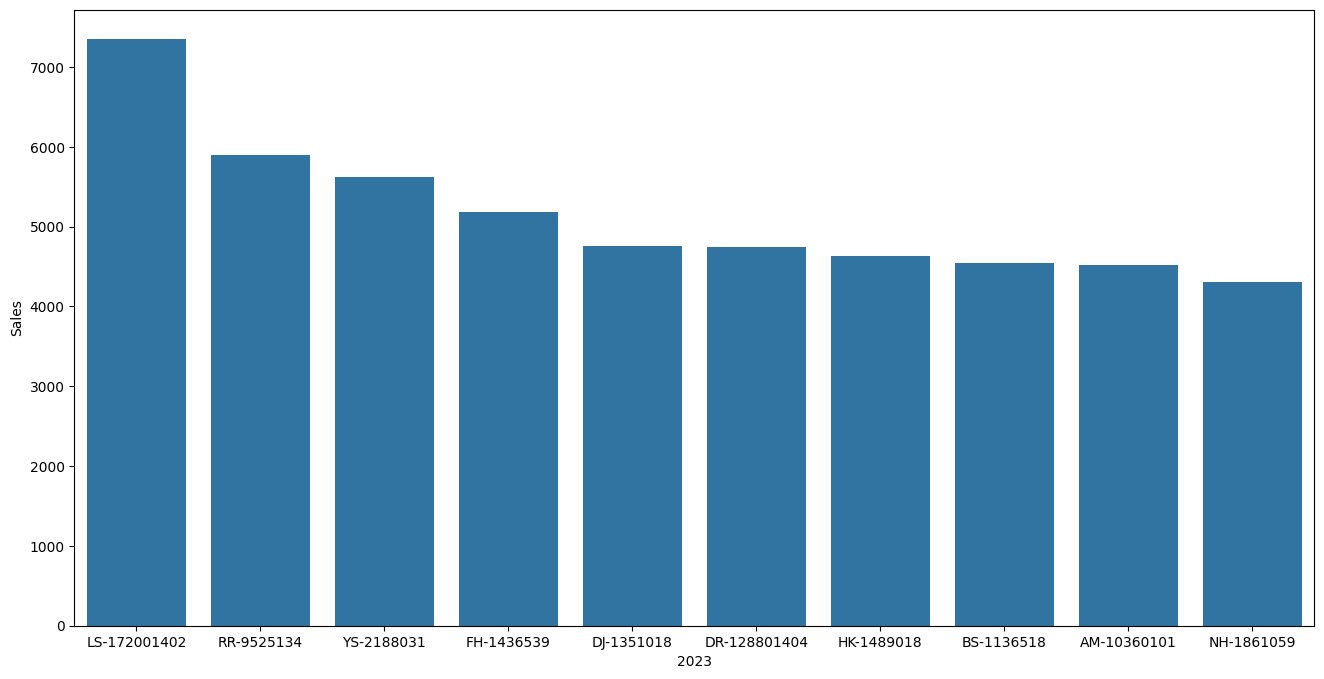

In [59]:
customer = df[['Customer ID', 'Sales', 'Year','Country']]
k = customer.groupby(['Customer ID', 'Year', 'Country']).sum('Sales').reset_index().sort_values(['Year','Sales'], ascending=[True, False])
top_10_customers_by_year = k.groupby('Year', as_index=False).apply(lambda x:x.head(10))
for year in [2020,2021,2022,2023]:
    plt.figure(figsize=(16,8))
    sns.barplot(data=top_10_customers_by_year[top_10_customers_by_year['Year']==year], x='Customer ID', y='Sales')
    plt.xlabel(year)
    

**In each year, we can see a list of top 10 customers who spent most and it changed yearly.  Towards visualizing top customers from each country every year, I choose PowerBI to perform this insight best.**

#### 10.	Which countries contributed most profits to each category?

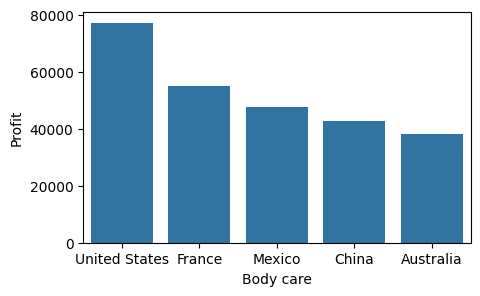

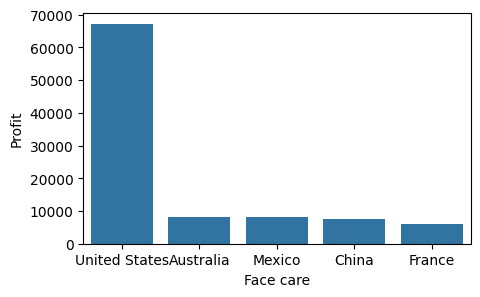

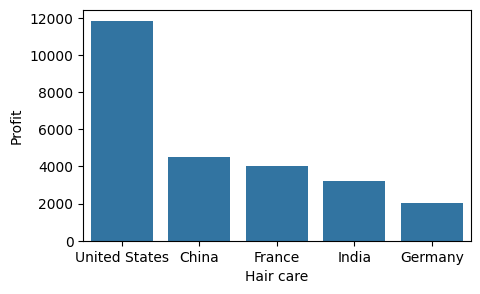

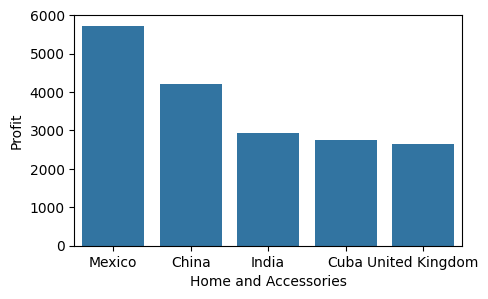

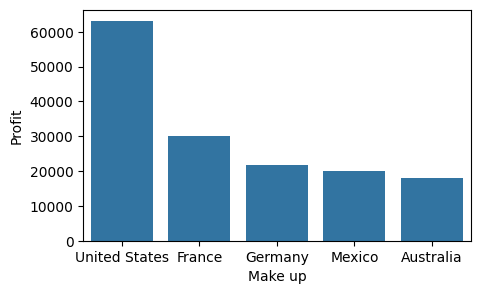

In [60]:
country_profit = df[['Country','Profit','Category']]
l = country_profit.groupby(['Country','Category']).sum('Profit').reset_index().sort_values('Profit', ascending=False)
top_country_profit_each_category = l.groupby('Category').apply(lambda x: x.head(5))
for category in top_country_profit_each_category['Category'].value_counts().index:
    plt.figure(figsize=(5,3))
    sns.barplot(data=top_country_profit_each_category[top_country_profit_each_category['Category']==category], x='Country', y='Profit')
    plt.xlabel(category)

**Total profit in 4 of 5 category were led by USA except for Home & Accessories was led by Mexico, which means that USA was one of the most potential country.**

### Summary Finding

After answering 10 questions above, I will summary all insights found out in below:

- The most profitable segment is Corporate
- The country bring most profit for the store is USA
- The market bring most profit for the store is Europe
- The best seller products of the store is Herbal Esssences Bio
- The best seller Category of the store is Body care and one of its subcategories - Nail care product is the best seller Subcategory
- All categories had an upward sales trend and grew sharply in 2022 and 2023
- However, profit trend of every category fluctuated in the same period, the majority of them reached peak in 2022 and fell in the next year.
- The store did not have a good discount stategy last a few years.
- Every year, the store has a different list of top 10 customers who spent most. The total sales of the customer who spent most was higher than that of customer spending most in the previous year. 
- USA brought most profit in 4 of 5 categories, other than Home & Accessories was led by Mexico

### Conclusion


This notebook has been successfully completed, and I have shared my findings about a global skincare and beauty store through various charts. Some insights, however, are limited and cannot be fully displayed here due to my current skillset and technology constraints. Nevertheless, these insights have been addressed and are showcased in Power BI, where an interactive dashboard has been created to display the insights and key performance indicators (KPIs). Each visualization includes annotations to help viewers easily understand and interpret my findings.

Thanks for reading and attention!